In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from IPython.display import display
pd.options.display.max_columns = None

In [7]:
df_vendas_pecas = pd.read_csv('../data/VENDAS_PECAS_BRAVOS.CSV', sep=';', encoding='iso-8859-1')

/home/matheus/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
# Tira negativo to custo
df_vendas_pecas.VAL_CUSTO_CONTABIL = df_vendas_pecas.VAL_CUSTO_CONTABIL.abs()

In [10]:
df_vendas_pecas

,EMPRESA,REVENDA,NUMERO_NOTA_FISCAL,SERIE_NOTA_FISCAL,TIPO_TRANSACAO,DTA_ENTRADA_SAIDA,DTA_DOCUMENTO,CLIENTE,DEPARTAMENTO,USUARIO,REVENDA_ORIGEM,QUANTIDADE,VAL_FRETE,VAL_DESCONTO,VAL_SEGURO,VAL_IPI,VAL_PIS,VAL_COFINS,VAL_TOTAL_REAL_ITEM,VAL_TOTAL_NOTA_ITEM,VAL_ICMS_RETIDO,VAL_CUSTO_CONTABIL,VAL_ICMS,VENDEDOR,VAL_ISS_RETIDO,COD_SETOR_VENDA,VAL_BONUS,MODELO
0,1,1,86,1,P07,2015/08/14 00:00:00.000,2015/08/14 00:00:00.000,40475,300,65,NaN,-1,0.0,0.00,NaN,NaN,0.00,0.00,-447.00,-447.00,0.00,447.00,0.00,NaN,NaN,P,0,NaN
1,1,1,695,0,P07,2015/06/13 00:00:00.000,2015/06/13 00:00:00.000,32933,300,65,NaN,-2,0.0,0.00,NaN,NaN,0.00,0.00,-535.66,-535.66,0.00,535.66,0.00,NaN,NaN,P,0,NaN
2,1,1,992,0,P07,2015/05/29 00:00:00.000,2015/05/29 00:00:00.000,46239,300,65,NaN,-2,0.0,0.00,NaN,0.0,0.00,0.00,-1949.69,-1949.69,0.00,1949.69,0.00,NaN,NaN,P,0,NaN
3,1,1,2566,1,P07,2015/07/31 00:00:00.000,2015/07/31 00:00:00.000,761,300,65,NaN,-1,0.0,0.00,NaN,NaN,-6.18,-28.47,-374.59,-374.59,0.00,339.94,0.00,NaN,NaN,P,0,NaN
4,1,1,3402,1,P07,2015/04/04 00:00:00.000,2015/04/04 00:00:00.000,898,300,65,NaN,-1,0.0,-25.83,NaN,NaN,0.00,0.00,-146.41,-146.41,0.00,146.41,0.00,NaN,NaN,P,0,NaN
5,1,1,3680,1,P07,2015/11/24 00:00:00.000,2015/11/24 00:00:00.000,898,300,65,NaN,-2,0.0,0.00,NaN,0.0,-2.38,-10.98,-144.50,-144.50,0.00,108.00,0.00,NaN,NaN,P,0,NaN
6,1,1,3746,01,P07,2015/12/18 00:00:00.000,2015/12/18 00:00:00.000,898,300,91,NaN,-2,0.0,0.00,NaN,NaN,-0.73,-3.37,-819.30,-819.30,0.00,815.20,0.00,NaN,NaN,P,0,NaN
7,1,1,10943,2,P07,2015/08/25 00:00:00.000,2015/08/25 00:00:00.000,51804,300,65,NaN,-3,0.0,0.00,NaN,0.0,0.00,0.00,-2567.28,-2567.28,0.00,2567.28,0.00,NaN,NaN,P,0,NaN
8,1,1,25332,ECF,P21,2015/03/02 00:00:00.000,2015/03/02 00:00:00.000,563,300,67,1.0,2,NaN,0.48,0.0,0.0,0.08,0.38,5.00,5.00,NaN,0.82,NaN,110027.0,0.0,P,0,NaN
9,1,1,25333,ECF,P21,2015/03/02 00:00:00.000,2015/03/02 00:00:00.000,43391,300,73,1.0,4,NaN,45.00,0.0,0.0,NaN,NaN,180.00,180.00,NaN,114.68,NaN,110047.0,0.0,P,0,NaN


In [12]:
len(df_vendas_pecas.VAL_CUSTO_CONTABIL.unique())

37812

### Gera identificador para a peça

Com base no valor da peça, definimos quais peças são únicas e criamos um id para cada uma

In [18]:
# Gerar identificador da peça
import string
import random
def randomString(stringLength=10):
    """Generate a random string of fixed length """
    letters = string.ascii_lowercase
    return ''.join(random.choice(letters) for i in range(stringLength))

In [21]:
gp_custo = df_vendas_pecas.groupby('VAL_CUSTO_CONTABIL')

In [22]:
uniq_values = df_vendas_pecas.VAL_CUSTO_CONTABIL.unique()

In [24]:
val_id = {}
for v in uniq_values:
    val_id[v] = randomString(5)

In [40]:
def add_peca_id(x):
    x['id_peca'] = val_id[x['VAL_CUSTO_CONTABIL']]
    return x

In [47]:
# Provavelmente ta burro pq demora
df_vendas_pecas = df_vendas_pecas.apply(add_peca_id, axis=1)

In [95]:
df_vendas_pecas.to_csv('../data/processed/pecas.csv')

### Agrupa por data e analisa qtd de vendas

In [97]:
df_vendas_pecas['DTA_ENTRADA_SAIDA'] = pd.to_datetime(df_vendas_pecas['DTA_ENTRADA_SAIDA'])

In [99]:
gp_vendas_pecas = pd.DataFrame(df_vendas_pecas.groupby('DTA_ENTRADA_SAIDA').NUMERO_NOTA_FISCAL.count())

In [102]:
idx = pd.date_range('02-02-2015', '12-20-2019')
#index = pd.DatetimeIndex(idx)
gp_vendas_pecas = gp_vendas_pecas.reindex(idx, fill_value=0)

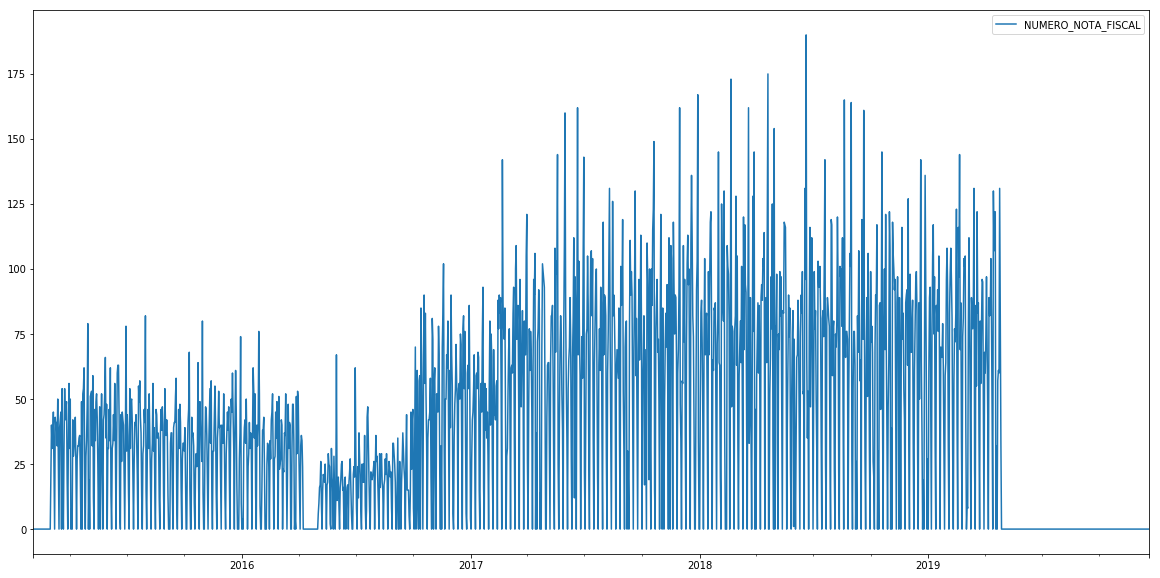

In [104]:
gp_vendas_pecas.plot.line(figsize=(20,10))

In [105]:
gp_vendas_pecas.to_csv('../data/processed/qtd_vendas_pecas_diaria.csv')

### Agrupado por data e analisa faturamento

In [107]:
gp_fat_pecas = pd.DataFrame(df_vendas_pecas.groupby('DTA_ENTRADA_SAIDA').VAL_CUSTO_CONTABIL.sum())

In [108]:
idx = pd.date_range('02-02-2015', '12-20-2019')
#index = pd.DatetimeIndex(idx)
gp_fat_pecas = gp_fat_pecas.reindex(idx, fill_value=0)

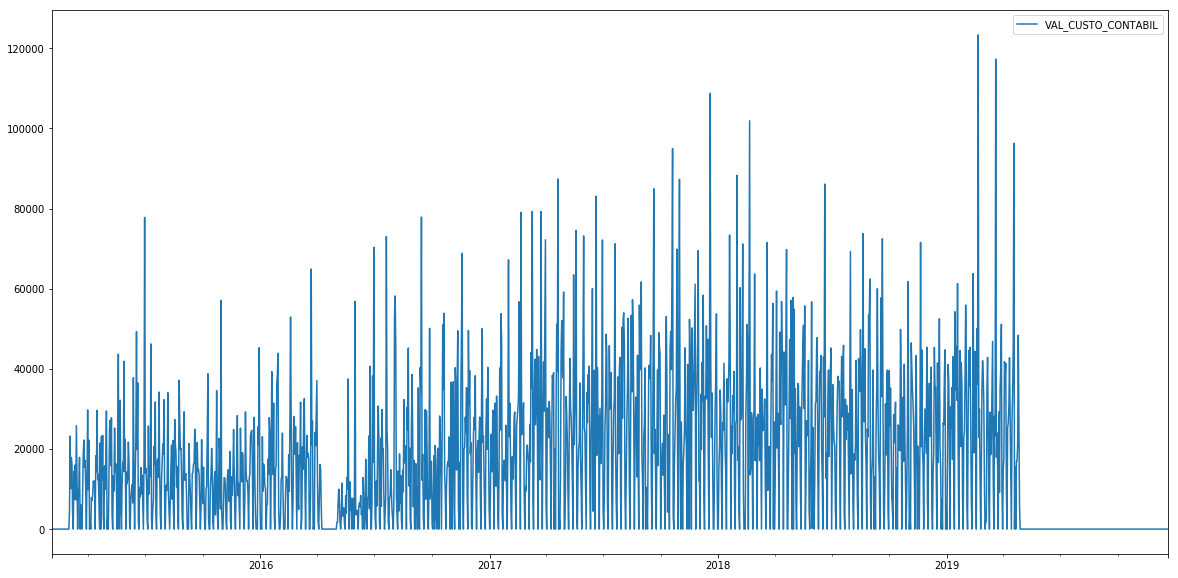

In [110]:
gp_fat_pecas.plot.line(figsize=(20,10))

In [113]:
gp_fat_pecas.to_csv('../data/processed/faturamento_vendas_pecas_diarias.csv')